CS4001/4042 Assignment 1, Part B, Q1
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [6]:
!pip install pytorch_tabular[extra]

zsh:1: no matches found: pytorch_tabular[extra]


In [7]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

> Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [8]:
df = pd.read_csv('hdb_price_prediction.csv')

# TODO: Enter your code here

train_data = df[df['year'] <= 2019]
validation_data = df[df['year'] == 2020]
test_data = df[df['year'] == 2021]

> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [9]:
# TODO: Enter your code here

# Define the target variable and the names of the continuous and categorical variables
target = ['resale_price']
continuous_cols = ['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']
categorical_cols = ['month', 'town', 'flat_model_type', 'storey_range']

# Define the data configuration
data_config = DataConfig(
    target=target,
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols
)

# Define the trainer configuration
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50
)

# Define the category embedding model configuration
model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",
)

# Define Optimizer Config
optimizer_config = OptimizerConfig()

# Initialise the model and put all the configs together
model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

# Train the model
model.fit(train=train_data, validation=validation_data)

# Report the test RMSE error and the test R2 value that you obtained
results = model.evaluate(test_data)
predictions = model.predict(test_data)

2023-10-13 16:55:01,469 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
Global seed set to 42
2023-10-13 16:55:01,492 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
2023-10-13 16:55:01,497 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for regression task
2023-10-13 16:55:01,597 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-10-13 16:55:01,626 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
/Users/advait/Desktop/gitpositories/SC4001-Assignment/env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:589: LightningDeprecationWarning: The Trainer argument `auto_select_gpus` has been deprecated in v1.9.0 and will be removed in v2.0.0. Please use the function `pytorch_lightning.accelerators.find_usable_cuda_devices` instead.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/Users/advait/Desktop/gitpositories/SC4001-Assignment/env/lib/python3.9/site-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
/Users/advait/Desktop/gitpositories/SC4001-Assignment/env/lib/python3.9/site-packages/pytorch_lightning/core/module.py:493: UserWarning: You called `self.log('train_mean_squared_error', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /Users/advait/Desktop/gitpositories/SC4001-Assignment/.lr_find_4cb302b0-42b5-490c-8cc2-90a5fc2382bf.ckpt
Restored all states from the checkpoint file at /Users/advait/Desktop/gitpositories/SC4001-Assignment/.lr_find_4cb302b0-42b5-490c-8cc2-90a5fc2382bf.ck

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-10-13 16:55:36,258 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
2023-10-13 16:55:36,259 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model


Output()

/Users/advait/Desktop/gitpositories/SC4001-Assignment/env/lib/python3.9/site-packages/pytorch_lightning/core/module
.py:493: UserWarning: You called `self.log('test_loss', ..., logger=True)` but have no logger configured. You can 
enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(

/Users/advait/Desktop/gitpositories/SC4001-Assignment/env/lib/python3.9/site-packages/pytorch_lightning/core/module
.py:493: UserWarning: You called `self.log('test_mean_squared_error', ..., logger=True)` but have no logger 
configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(

/Users/advait/Desktop/gitpositories/SC4001-Assignment/env/lib/python3.9/site-packages/pytorch_lightning/utilities/cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(
/Users/advait/Desktop/gitpositories/SC4001-Assignment/env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       5882418176.0        │
│  test_mean_squared_error  │       5882418176.0        │
└───────────────────────────┴───────────────────────────┘

Output()

> Report the test RMSE error and the test R2 value that you obtained.



- RMSE:  76696.92586971245
- R2:  0.7776187530460417

In [10]:
import math
from sklearn.metrics import r2_score, mean_squared_error

print("RMSE: ", math.sqrt(mean_squared_error(test_data['resale_price'], predictions['resale_price_prediction'])))
print("R2: ", r2_score(test_data['resale_price'], predictions['resale_price_prediction']))


RMSE:  76696.92586971245
R2:  0.7776187530460417


> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [11]:
test_data['predictions'] = predictions['resale_price_prediction']
test_data['error'] = (test_data['resale_price'] - test_data['predictions'])**2
worst = test_data.sort_values(by=['error'], ascending=False).head(25)
best = test_data.sort_values(by=['error'], ascending=True).head(25)

/var/folders/lv/l4xn1q3s7jxgwb_811k8vqrh0000gn/T/ipykernel_8022/2813670542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions'] = predictions['resale_price_prediction']
/var/folders/lv/l4xn1q3s7jxgwb_811k8vqrh0000gn/T/ipykernel_8022/2813670542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['error'] = (test_data['resale_price'] - test_data['predictions'])**2


From the below dataframe. We can observe that most of these properties have features such as being more premium flat types, having a high proximity to Dhoby Ghaut, being close to MRT Stations and so on. All of which imply that they are likely to have a very high resale price. This points us towards the fact that the higher errors are found among properties with a higher resale price. Additionally, it also appears that the predictions consistently underestimate the resale price.

We can observe from the plots below that this is indeed the case. Where there is a positive correlation of about 0.5 between the resale price and the error. 

To address this, we can use the following techniques:

- Data Sampling: It is possible that the fewer number of samples for higher-priced premium properties results in the model not having sufficient information to make accurate predictions regarding their price. Furthermore, it is possible that the model is overfitting to the data that predominantly consists of more standard properties.

- Feature Engineering: This is because a property that is close to an MRT station, with a premium flat type, is high-rise, etc. gives rise to a valuation that is usually more than just the sum of its parts. Hence we can consider the the interaction between different features through interaction terms to model their conmbined effect on resale price. 

In [12]:
worst

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,predictions,error
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,3.646865e+05,1.724853e+11
90957,6,2021,BUKIT BATOK,288A BUKIT BATOK STREET 25,Bukit Batok,1.292540,10.763777,0.016807,0.000217,"EXECUTIVE, Apartment",75.583333,144.0,10 TO 12,968000.0,6.144983e+05,1.249634e+11
112128,12,2021,TAMPINES,156 TAMPINES STREET 12,Tampines,0.370873,12.479752,0.033613,0.000229,"EXECUTIVE, Maisonette",61.750000,148.0,01 TO 03,998000.0,6.555936e+05,1.172421e+11
90608,12,2021,BISHAN,273B BISHAN STREET 24,Bishan,0.776182,6.297489,0.033613,0.015854,"5 ROOM, DBSS",88.833333,120.0,37 TO 39,1360000.0,1.020589e+06,1.152001e+11
106192,12,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,6.359389e+05,1.102646e+11
91871,6,2021,BUKIT MERAH,17 TIONG BAHRU ROAD,Tiong Bahru,0.693391,2.058774,0.016807,0.047782,"3 ROOM, Standard",50.583333,88.0,01 TO 03,680888.0,3.583568e+05,1.040264e+11
93825,8,2021,CENTRAL AREA,4 TANJONG PAGAR PLAZA,Tanjong Pagar,0.451637,2.594828,0.016807,0.103876,"5 ROOM, Adjoined flat",54.583333,118.0,16 TO 18,938000.0,6.179542e+05,1.024293e+11
92504,12,2021,BUKIT MERAH,49 KIM PONG ROAD,Tiong Bahru,0.468378,2.365532,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,695000.0,3.760023e+05,1.017595e+11
105695,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,6.124678e+05,1.008267e+11
90432,8,2021,BISHAN,275A BISHAN STREET 24,Bishan,0.827889,6.370404,0.033613,0.015854,"5 ROOM, DBSS",88.916667,120.0,25 TO 27,1280000.0,9.629781e+05,1.005029e+11


In [13]:
!pip install seaborn

You should consider upgrading via the '/Users/advait/Desktop/gitpositories/SC4001-Assignment/env/bin/python -m pip install --upgrade pip' command.


<Axes: xlabel='month', ylabel='resale_price'>

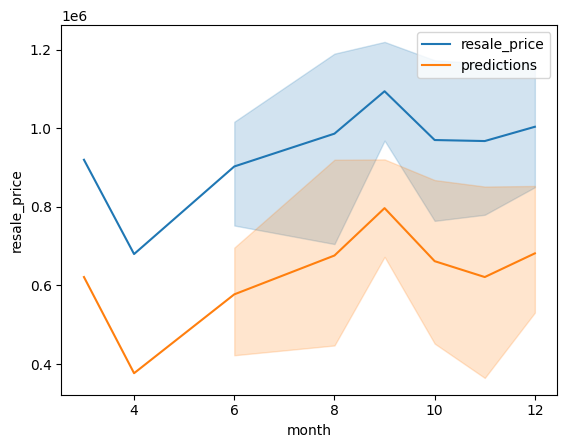

In [37]:
# plot predictions and resale_price as line plots

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=worst, x='month', y='resale_price', label='resale_price')
sns.lineplot(data=worst, x='month', y='predictions', label='predictions')


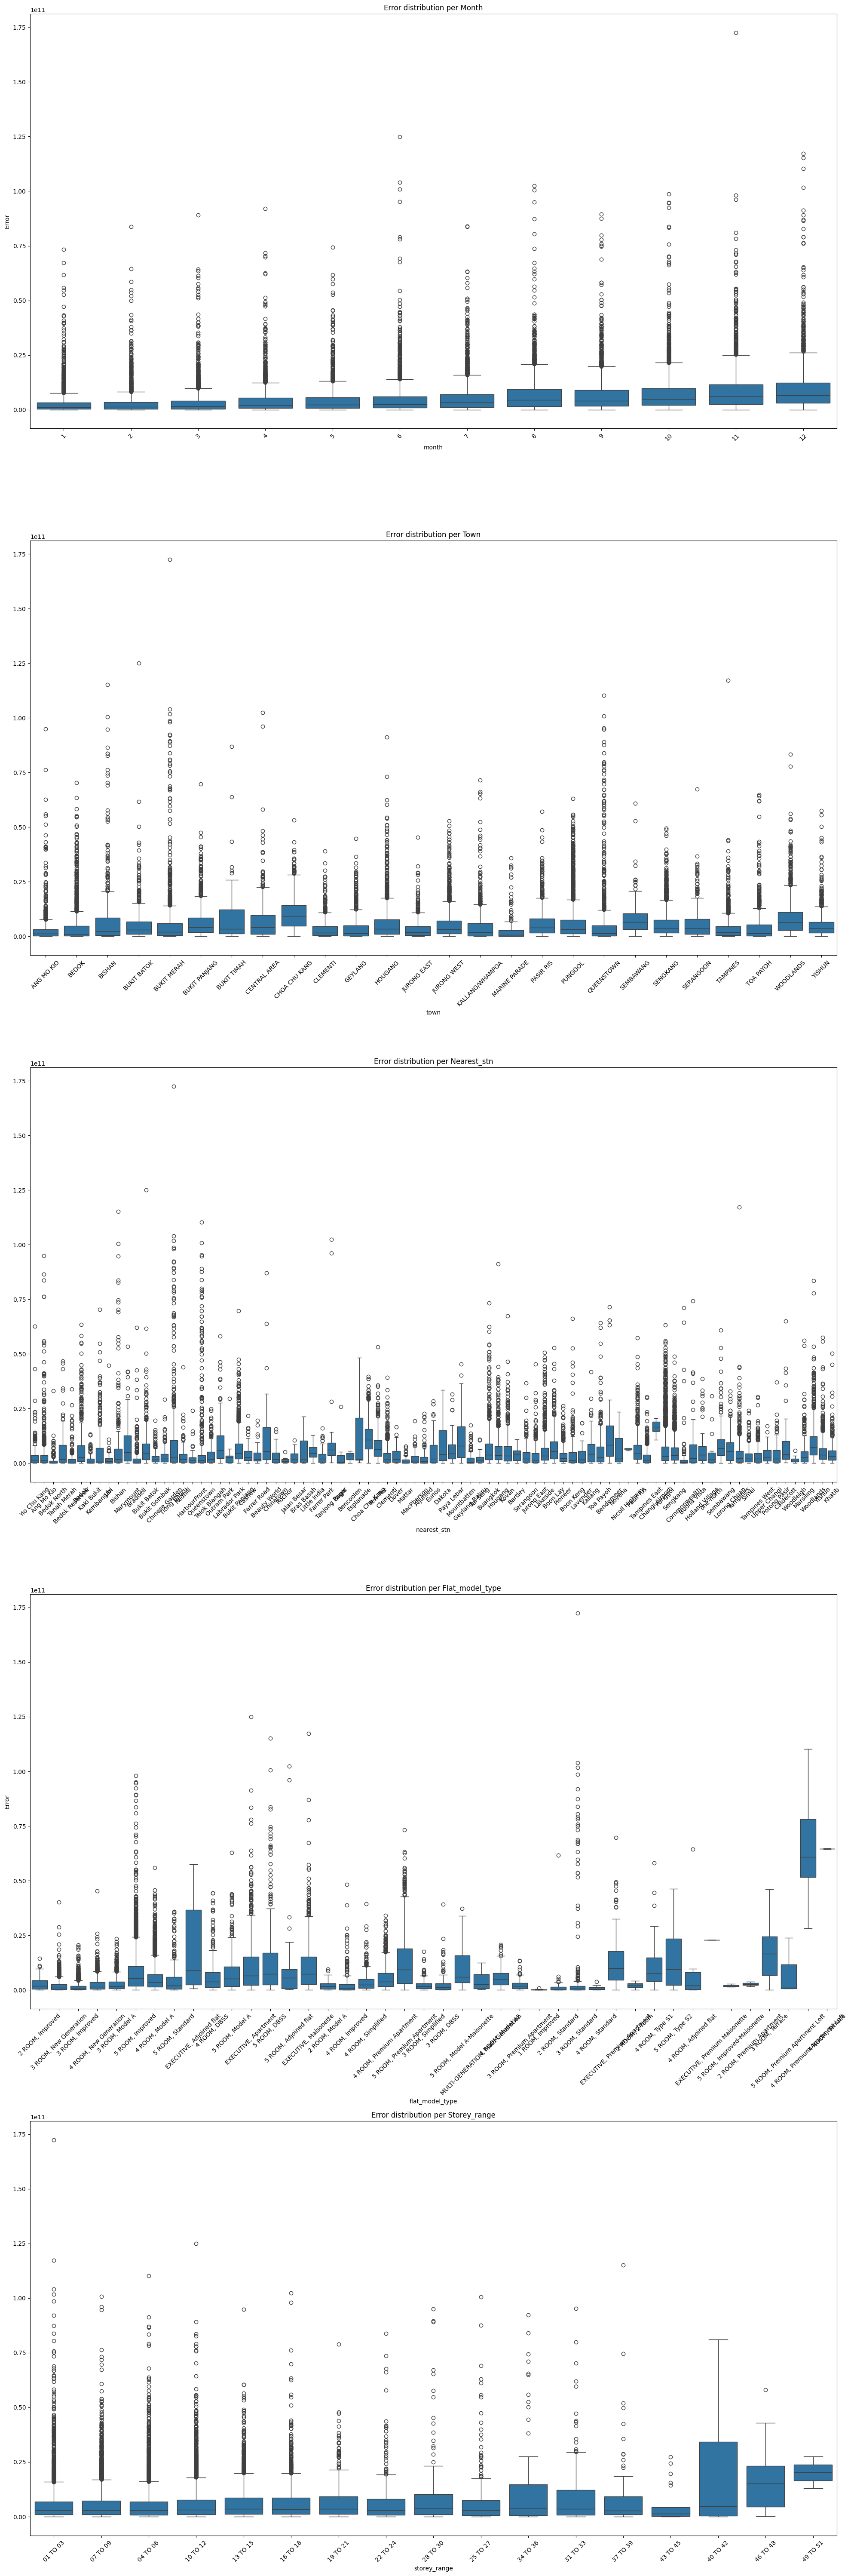

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 60))

features_to_explore = ['month', 'town', 'nearest_stn', 'flat_model_type', 'storey_range']

# Creating subplots
for i, feature in enumerate(features_to_explore, 1):
    plt.subplot(5, 1, i)
    sns.boxplot(data=test_data, x=feature, y='error')
    plt.xticks(rotation=45)
    plt.title(f'Error distribution per {feature.capitalize()}')
    if i == 1 or i == 4:  # Adding y-label only to the first plot in each row for clarity
        plt.ylabel('Error')
    else:
        plt.ylabel('')

plt.tight_layout()
plt.show()


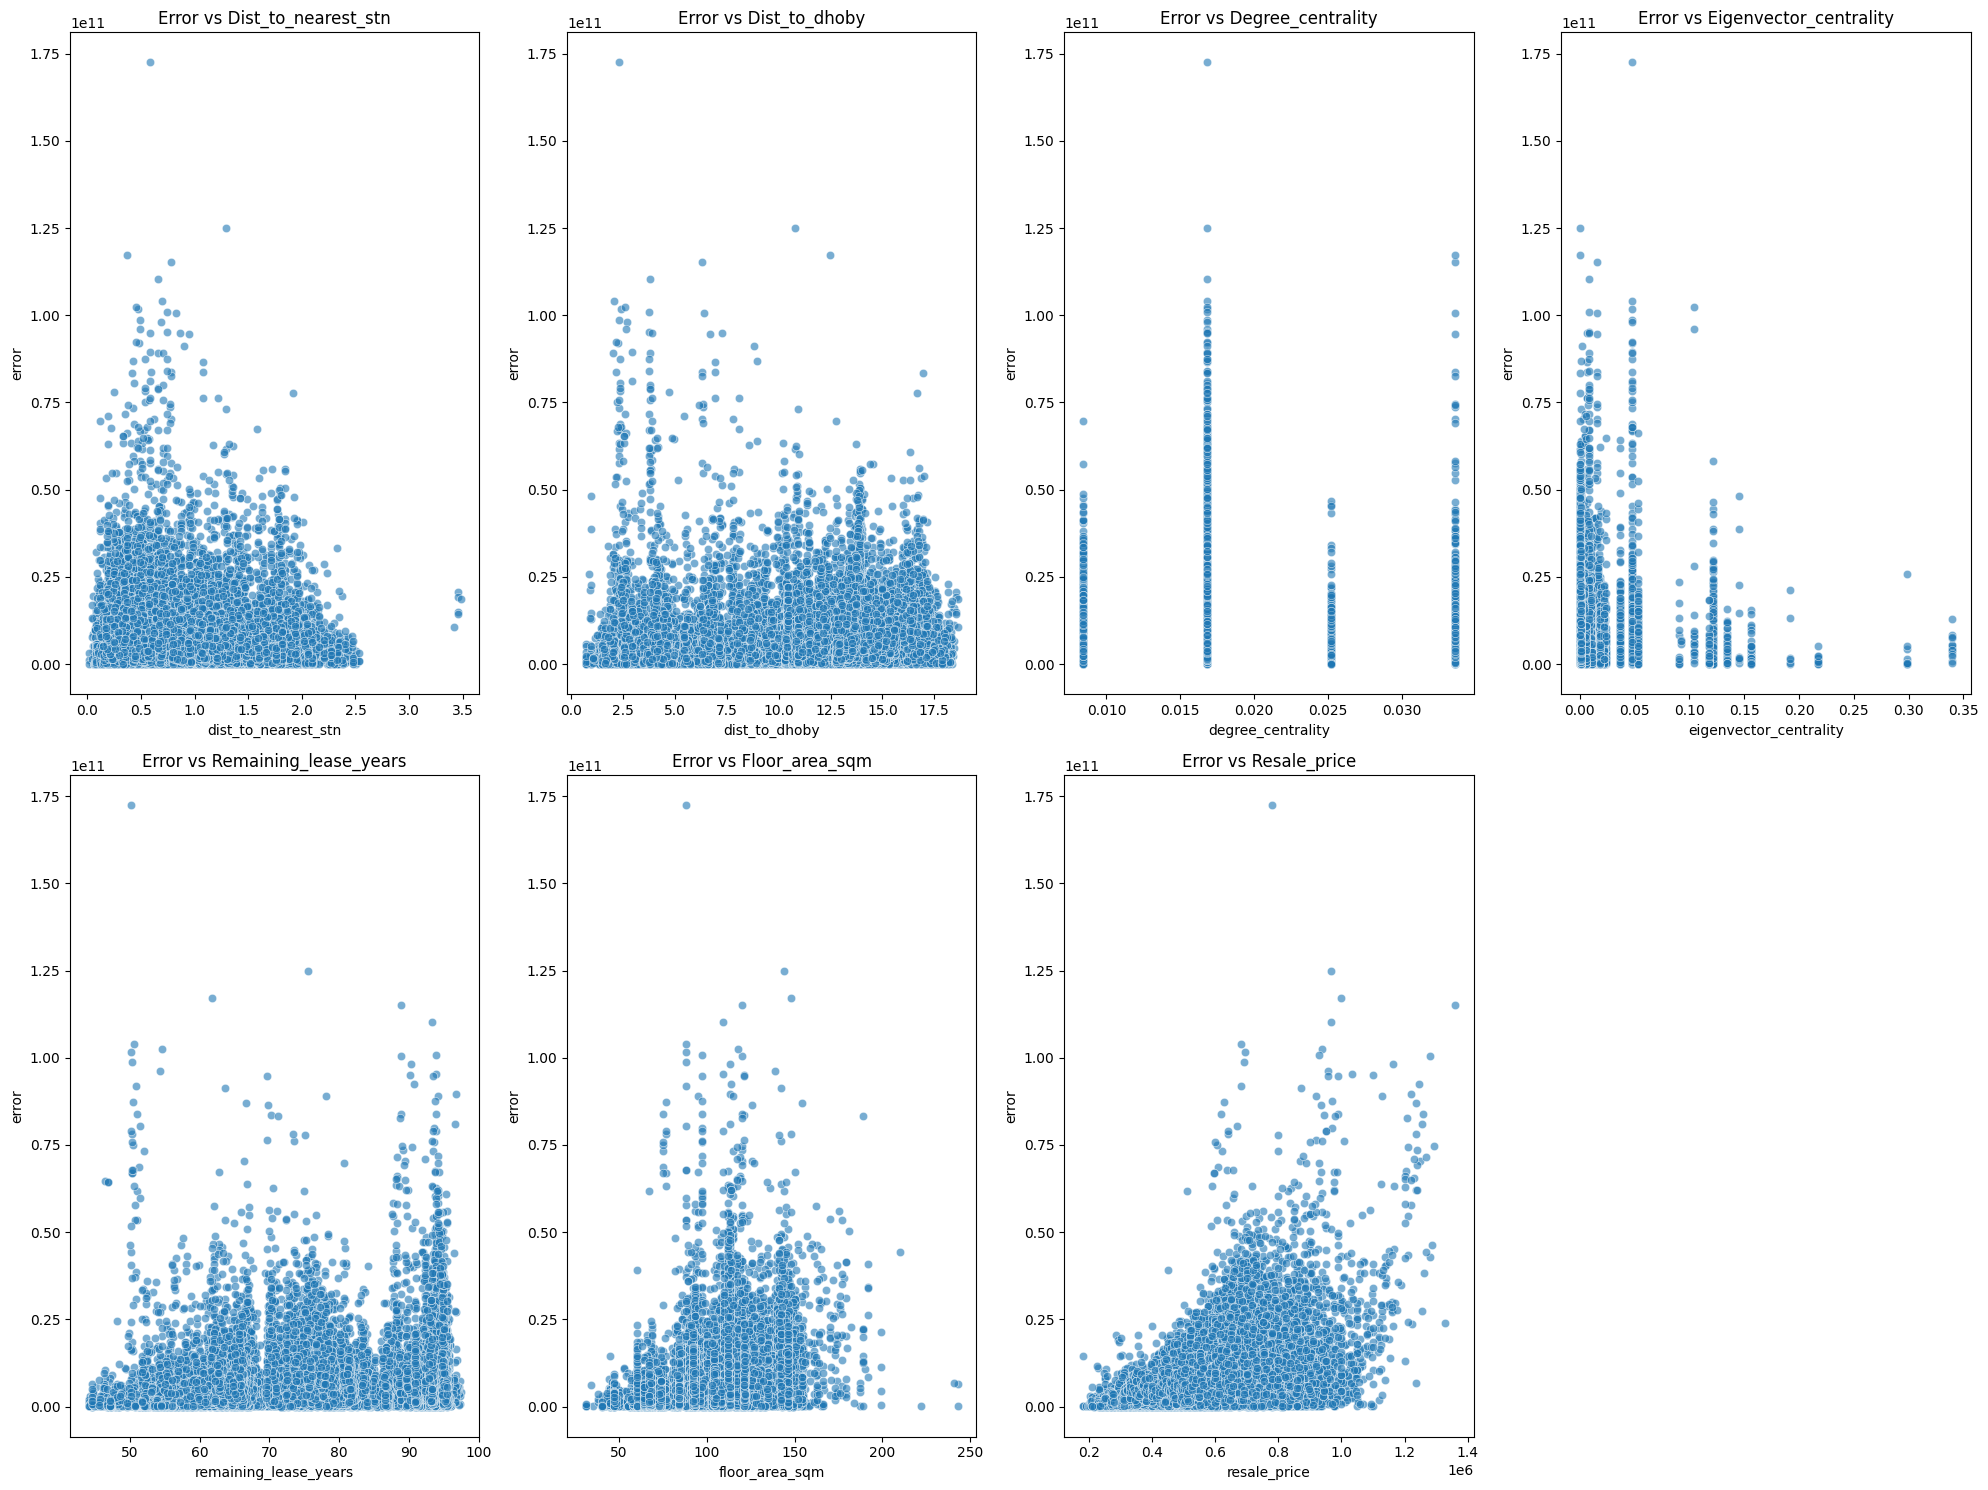

dist_to_nearest_stn       0.056535
dist_to_dhoby             0.051065
degree_centrality        -0.034424
eigenvector_centrality    0.007588
remaining_lease_years     0.190550
floor_area_sqm            0.315018
resale_price              0.499009
Name: error, dtype: float64

In [31]:
# Continuous features to explore
continuous_features = [
    'dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 
    'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm', 
    'resale_price'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create scatter plots for continuous features vs error
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=test_data, x=feature, y='error', alpha=0.6)
    plt.title(f'Error vs {feature.capitalize()}')

plt.tight_layout()
plt.show()

# Compute correlation of error with continuous features
correlations = test_data[continuous_features + ['error']].corr()['error'].drop('error')

correlations


In [16]:
model.save_model("saved_models/b1")

2023-10-13 16:55:46,630 - {pytorch_tabular.tabular_model:1289} - WARNING - Directory is not empty. Overwriting the contents.
